<a href="https://colab.research.google.com/github/ADHIL-VENGAT/MA902-Research-Methods/blob/main/MA902_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Part 1: Exploratory Data Analysis

In [ ]:
dataset=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df = dataset.copy()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 10 featues which are of type "object" which need to be converted from label to numerical

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Checking for nan values using heatmap

<AxesSubplot:>

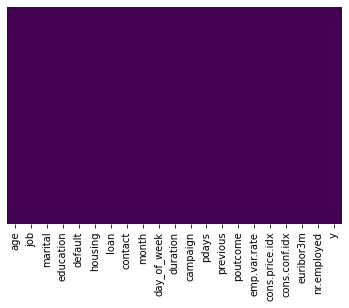

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


There are no missing values but 'unknown' should be considered as missing values

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

our target is feature 'default' which contains many 'unknown' missing values.

In [ ]:
yes = dataset[dataset['default'] == 'yes']
no = df[df['default'] == 'no']
unknown = df[df['default'] == 'unknown']

In [ ]:
yes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

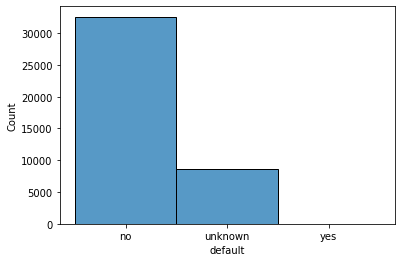

In [ ]:
sns.histplot(data=df, x="default")
df['default'].value_counts()

# All the 'unknown' entries are missing values and they are dropped

In [ ]:
df = df.replace('unknown',float("nan"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

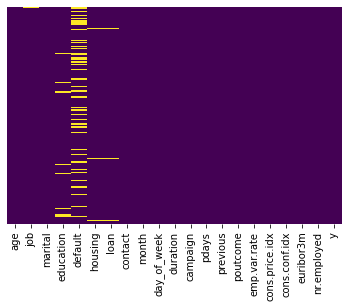

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.info()


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [ ]:
df_unknown_dropped =df.copy()

In [ ]:
df.shape

(30488, 21)

# Encoding default from categorical to [1,0]

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df['default'].value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [ ]:
df =pd.get_dummies(df.copy(), columns=['default'],drop_first=True).rename(columns={'default_yes': 'default'})
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


train_set, test_set = train_test_split(df, test_size=0.2, random_state=50, stratify= df['default'] )  
#by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

X_train = train_set.copy().drop(['default'],axis = 1)
y_train = train_set['default'].copy()
X_test = test_set.copy().drop(['default'],axis = 1)
y_test = test_set['default'].copy()

# Dropping irrelevent  features[ 'Duration','contact','month','day_of_week','pdays','poutcome','previous','y'

Most of thge features related to campaign may not have any impact on feature['default']

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

In [ ]:
df = df.drop(['duration','contact','month','day_of_week','campaign','pdays','poutcome','previous','y'],axis=1)

In [ ]:
df

,age,job,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,housemaid,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,blue-collar,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0


# Checking for the imbalance in dataset

In [ ]:
df_unknown_dropped.shape

(30488, 21)

(no     30485
 yes        3
 Name: default, dtype: int64,
 <AxesSubplot:xlabel='default', ylabel='Count'>)

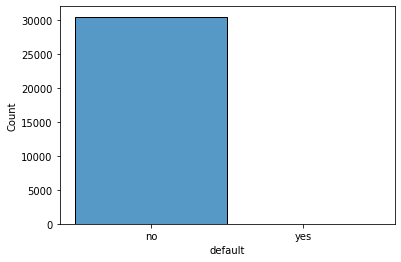

In [ ]:
df_unknown_dropped['default'].value_counts(),sns.histplot(df_unknown_dropped['default'])

(yes    16521
 no     13967
 Name: housing, dtype: int64,
 <AxesSubplot:xlabel='housing', ylabel='Count'>)

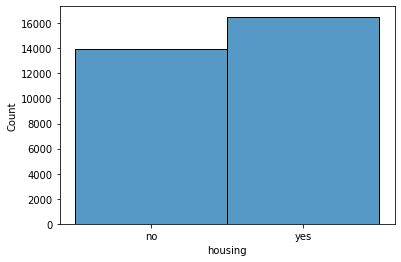

In [ ]:
df_unknown_dropped['housing'].value_counts(),sns.histplot(df_unknown_dropped['housing'])

(no     25720
 yes     4768
 Name: loan, dtype: int64,
 <AxesSubplot:xlabel='loan', ylabel='Count'>)

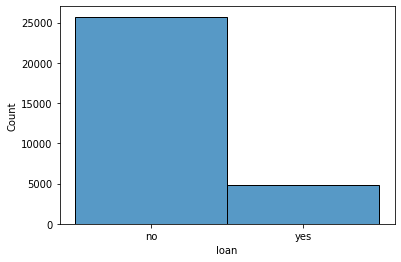

In [ ]:
df_unknown_dropped['loan'].value_counts(),sns.histplot(df_unknown_dropped['loan'])

The dataset is highly imbalanced with a lot of 0 values


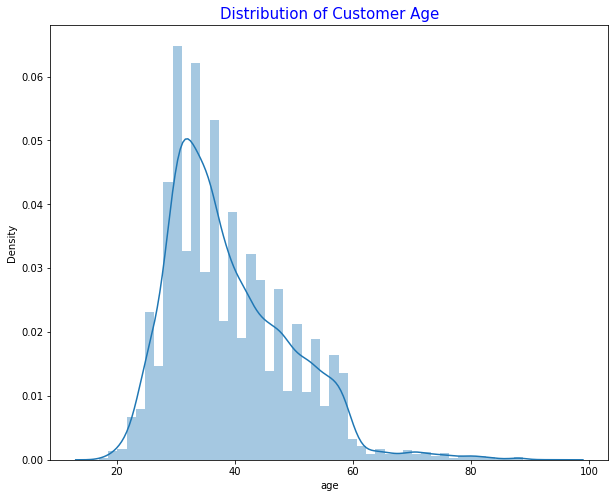

In [ ]:
#distribution of customer age
plt.figure(figsize = (10,8))
sns.distplot(df['age'])
plt.title("Distribution of Customer Age", fontsize = 15, color = 'b')
plt.show()
#The graph looks right skewed

df_dtale

In [ ]:
import dtale

In [ ]:
dtale.show(df)

In [ ]:

#visualize of the customer job based on age


if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['age'],
	df['default'],
	df['job'],
], axis=1)
chart_data = chart_data.query("""(`job` == 'admin.') or (`job` == 'blue-collar') or (`job` == 'entrepreneur') or (`job` == 'housemaid') or (`job` == 'management') or (`job` == 'retired') or (`job` == 'self-employed') or (`job` == 'services') or (`job` == 'student') or (`job` == 'technician') or (`job` == 'unemployed')""")
chart_data = chart_data.sort_values(['job', 'age'])
chart_data = chart_data.rename(columns={'age': 'age'})
chart_data_count = chart_data.groupby(['job', 'age'])[['default']].count()
chart_data_count.columns = ['count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

fig = px.line(chart_data, x="age", y="count", color='job', title='Job vs Age')
fig.show()

In [ ]:
#visualize of the customer Education based on age

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['age'],
	df['default'],
	df['education'],
], axis=1)
chart_data = chart_data.query("""(`education` == 'basic.4y') or (`education` == 'basic.6y') or (`education` == 'basic.9y') or (`education` == 'high.school') or (`education` == 'illiterate') or (`education` == 'professional.course') or (`education` == 'university.degree')""")
chart_data = chart_data.sort_values(['education', 'age'])
chart_data = chart_data.rename(columns={'age': 'age'})
chart_data_count = chart_data.groupby(['education', 'age'])[['default']].count()
chart_data_count.columns = ['count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
fig = px.line(chart_data, x="age", y="count", color='education', title='Education vs Age')
fig.show()

In [ ]:
#X_train

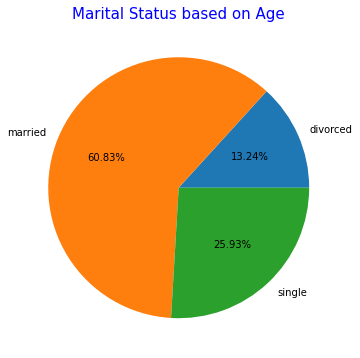

In [ ]:
#visualize of marital status based on age
marital_age = df.groupby('marital')['age'].sum().reset_index()
plt.figure(figsize = (8,6))
plt.pie(marital_age['age'], labels = marital_age['marital'], autopct = '%1.2f%%', )
plt.title('Marital Status based on Age', fontsize = 15, color = 'blue')
plt.show()

Text(0, 0.5, 'Count')

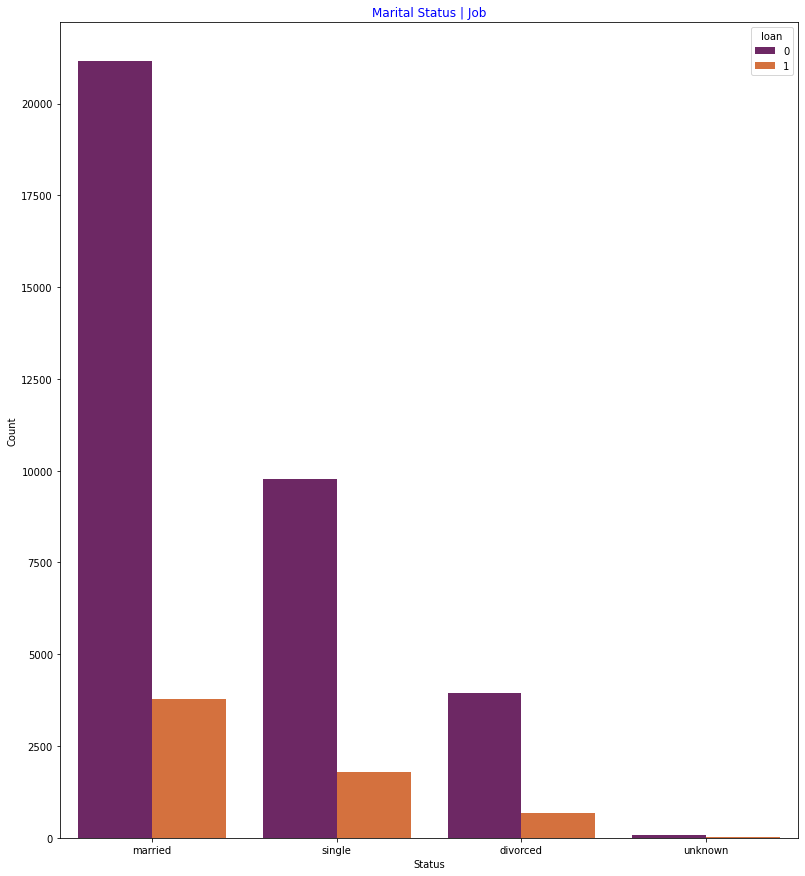

In [ ]:
#visualize of customer loan status 
loan_df =pd.get_dummies(df.copy(), columns=['loan'],drop_first=True).rename(columns={'loan_yes': 'loan'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(loan_df['marital'],hue=loan_df['loan'],palette = 'inferno')
plt.title('Marital Status | Job', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

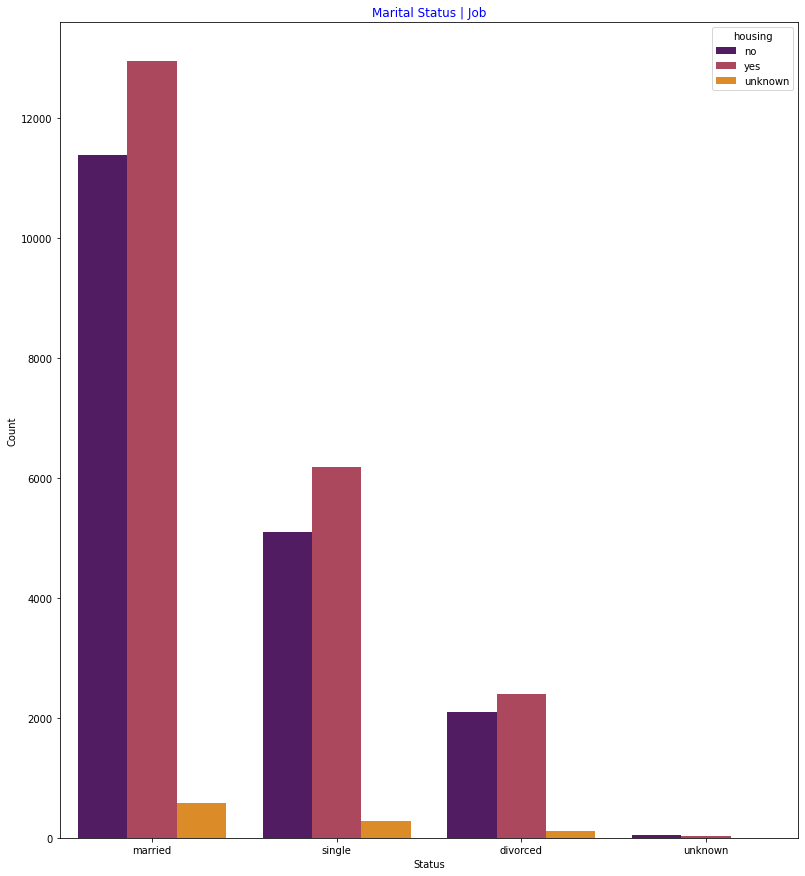

In [ ]:
#visualize of customer loan status 
loan_df =pd.get_dummies(df.copy(), columns=['loan'],drop_first=True).rename(columns={'loan_yes': 'loan'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(loan_df['marital'],hue=loan_df['housing'],palette = 'inferno')
plt.title('Marital Status | Job', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

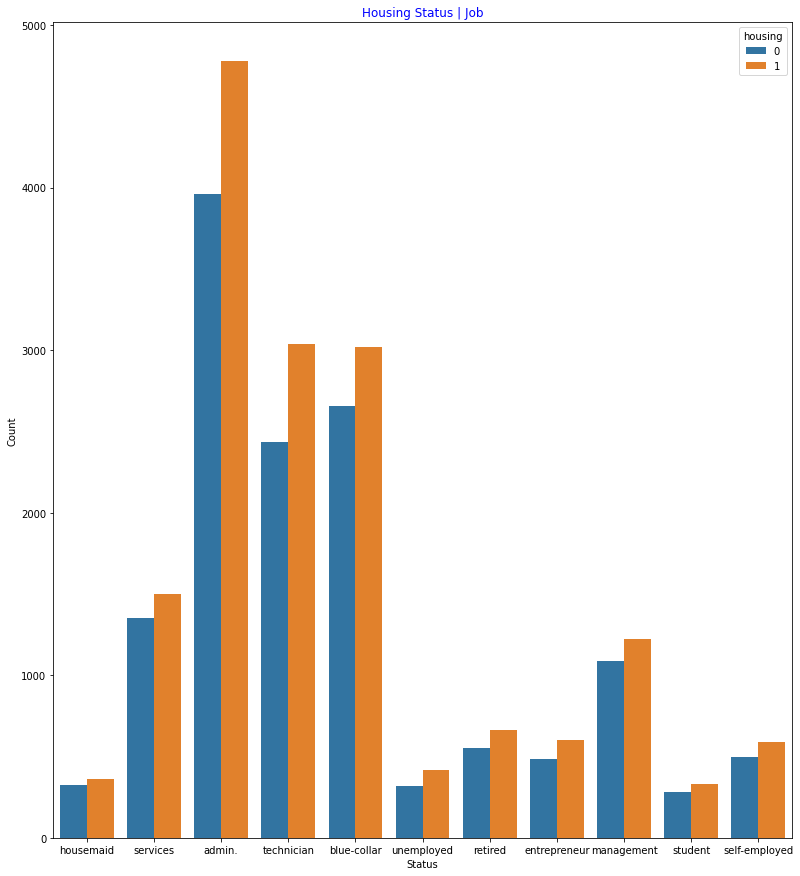

In [ ]:
#visualize of customer housing status 
housing_df =pd.get_dummies(df.copy(), columns=['housing'],drop_first=True).rename(columns={'housing_yes': 'housing'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(housing_df['job'],hue=housing_df['housing'])
plt.title('Housing Status | Job', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')

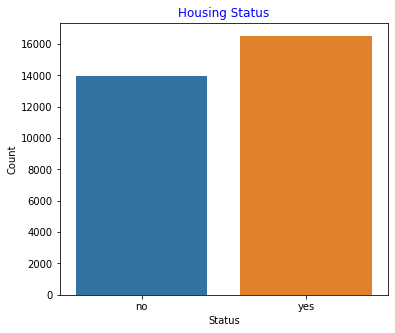

Text(0, 0.5, 'Count')

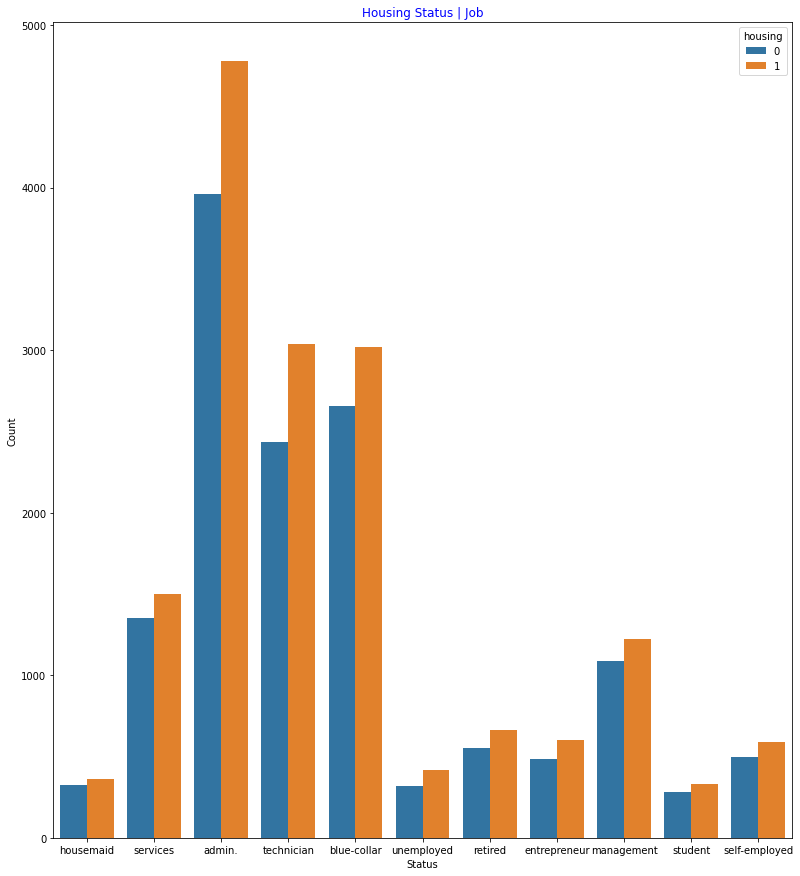

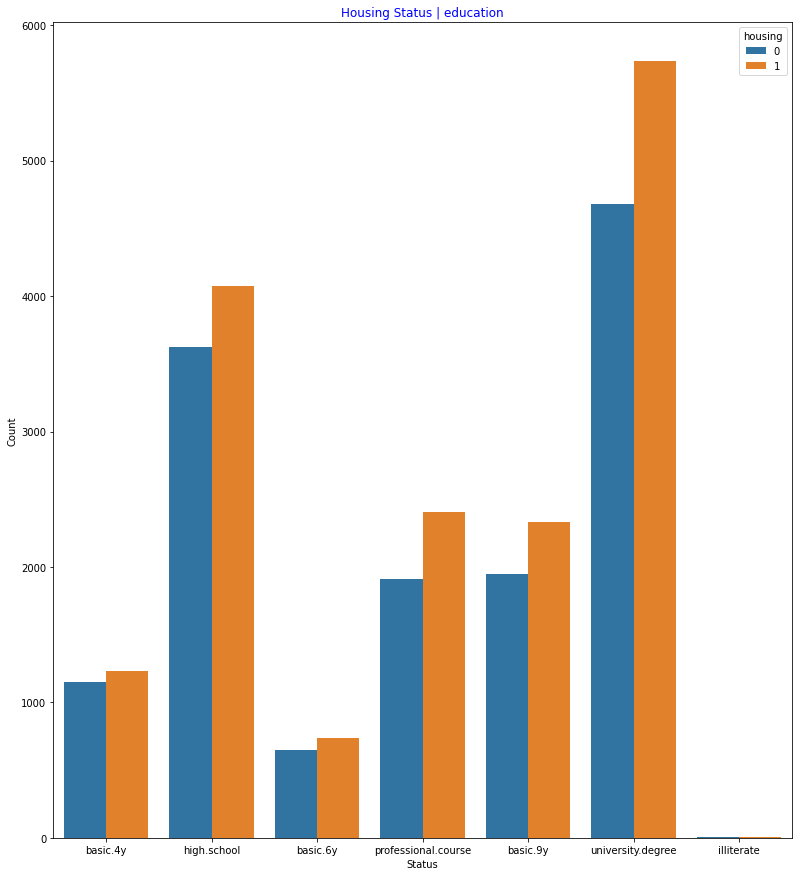

In [ ]:
#visualize of customer housing status 
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(df['housing'])
plt.title('Housing Status', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
#visualize of customer housing status 
housing_df =pd.get_dummies(df.copy(), columns=['housing'],drop_first=True).rename(columns={'housing_yes': 'housing'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(housing_df['job'],hue=housing_df['housing'])
plt.title('Housing Status | Job', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')
#visualize of customer housing status 
housing_df =pd.get_dummies(df.copy(), columns=['housing'],drop_first=True).rename(columns={'housing_yes': 'housing'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(housing_df['education'],hue=housing_df['housing'])
plt.title('Housing Status | education', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')



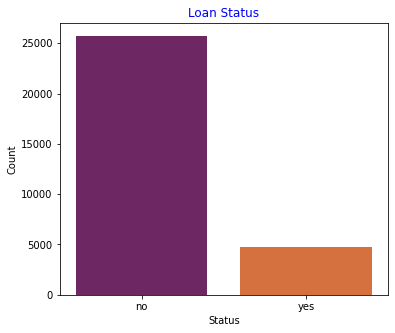

Text(0, 0.5, 'Count')

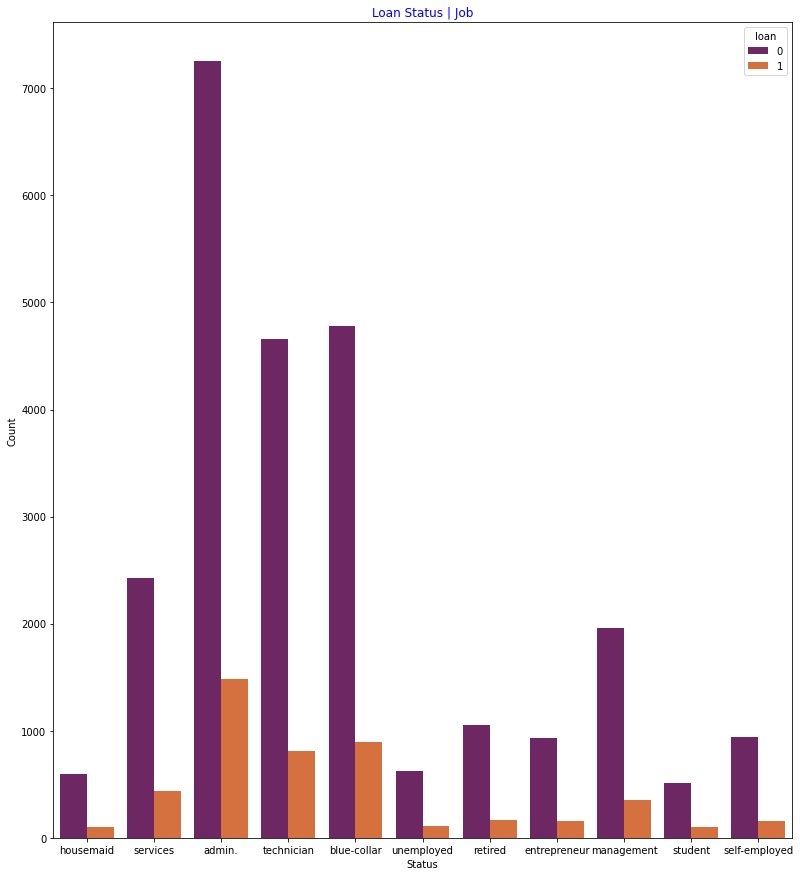

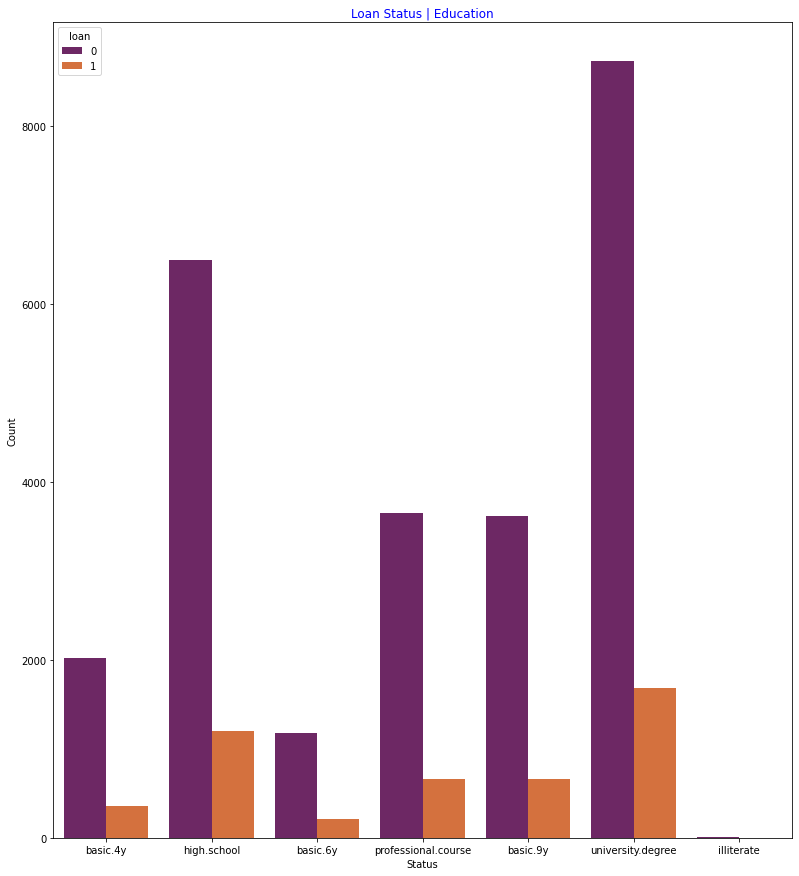

In [ ]:
#visualize of customer loan status based on age
plt.subplot(1, 3, 2)
sns.countplot(df['loan'], palette = 'inferno')
plt.title('Loan Status', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
#visualize of customer loan status 
loan_df =pd.get_dummies(df.copy(), columns=['loan'],drop_first=True).rename(columns={'loan_yes': 'loan'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(loan_df['job'],hue=loan_df['loan'],palette = 'inferno')
plt.title('Loan Status | Job', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')
#visualize of customer education status 
loan_df =pd.get_dummies(df.copy(), columns=['loan'],drop_first=True).rename(columns={'loan_yes': 'loan'})
plt.figure(figsize = (45,15))
plt.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.countplot(loan_df['education'],hue=loan_df['loan'],palette = 'inferno')
plt.title('Loan Status | Education', color = 'b')
plt.xlabel('Status')
plt.ylabel('Count')

feature 'Job' can be ranked based upon analysing impact of job on housing and loan status

<AxesSubplot:xlabel='job', ylabel='default'>

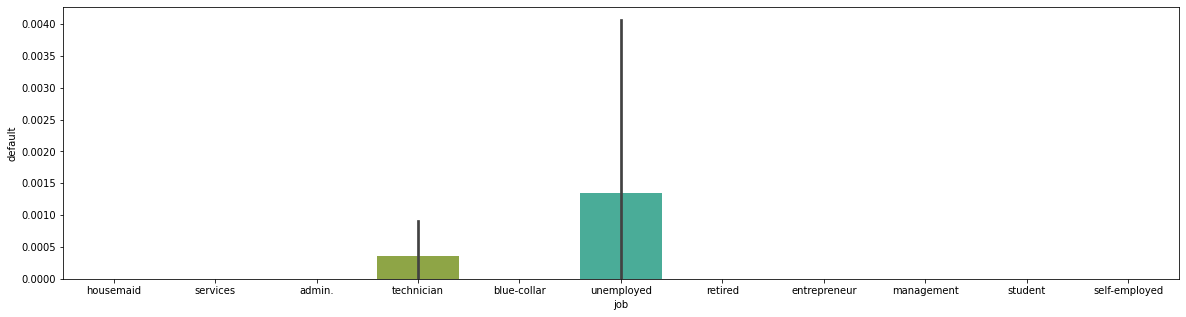

In [ ]:
#Visualize default | Jobs
fig_dims = (15, 8)
sns.barplot(x='job',y='default',data=df)

# Part 2: FEATURE ENGINEERING


# converting categorical features

In [ ]:
# Ranking categorical variable by ordinal number replacement

rank_map = {'student':0,
               'housemaid':1,
               'unemployed':2,
               'entrepreneur':3,
               'self-employed':4,
                'retired':5,
            'management':6,
            'services':7,
            'technician':8,
            'blue-collar':9,
            'admin.':10
}

df['job'] =df.job.map(rank_map)

In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [ ]:
print(cat_features,'\n')
print('There are ',len(cat_features), 'features  which are of type "object" which need to be converted from label to numerical')


['marital', 'education', 'housing', 'loan'] 

There are  4 features  which are of type "object" which need to be converted from label to numerical


In [ ]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features,drop_first=True)

In [ ]:
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  int64  
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   emp.var.rate    30488 non-null  float64
 7   cons.price.idx  30488 non-null  float64
 8   cons.conf.idx   30488 non-null  float64
 9   euribor3m       30488 non-null  float64
 10  nr.employed     30488 non-null  float64
 11  default         30488 non-null  uint8  
dtypes: float64(5), int64(2), object(4), uint8(1)
memory usage: 2.6+ MB


In [ ]:
print(cat_features)

['marital', 'education', 'housing', 'loan']


In [ ]:
encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_train_oho = encoder.transform(df)
X_train_oho.shape

(30488, 18)

In [ ]:
X_train_oho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30488 non-null  int64  
 1   job                            30488 non-null  int64  
 2   emp.var.rate                   30488 non-null  float64
 3   cons.price.idx                 30488 non-null  float64
 4   cons.conf.idx                  30488 non-null  float64
 5   euribor3m                      30488 non-null  float64
 6   nr.employed                    30488 non-null  float64
 7   default                        30488 non-null  uint8  
 8   marital_married                30488 non-null  uint8  
 9   marital_single                 30488 non-null  uint8  
 10  education_basic.6y             30488 non-null  uint8  
 11  education_basic.9y             30488 non-null  uint8  
 12  education_high.school          30488 non-null 

# Analysing Numerical features

In [ ]:
# list of numerical variables
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(num_features))

# visualise the numerical variables
df[num_features].head()

Number of numerical variables:  8


,age,job,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,1.1,93.994,-36.4,4.857,5191.0,0
2,40,10,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,1.1,93.994,-36.4,4.857,5191.0,0
4,59,10,1.1,93.994,-36.4,4.857,5191.0,0


#  ----> Discrete features in numerical features

In [ ]:
discrete_feature=[feature for feature in num_features if len(data[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [ ]:
discrete_feature

['job', 'emp.var.rate', 'nr.employed', 'default']

In [ ]:
df[discrete_feature].head()

,job,emp.var.rate,nr.employed,default
0,1,1.1,5191.0,0
1,7,1.1,5191.0,0
2,10,1.1,5191.0,0
3,7,1.1,5191.0,0
4,10,1.1,5191.0,0


# B. ----> Continuous features in numerical features

In [ ]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [ ]:
df

,age,job,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,1,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,married,high.school,yes,no,1.1,93.994,-36.4,4.857,5191.0,0
2,40,10,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,married,high.school,no,yes,1.1,93.994,-36.4,4.857,5191.0,0
4,59,10,married,professional.course,no,no,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,5,married,professional.course,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
30484,46,9,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,5,married,university.degree,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,8,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0


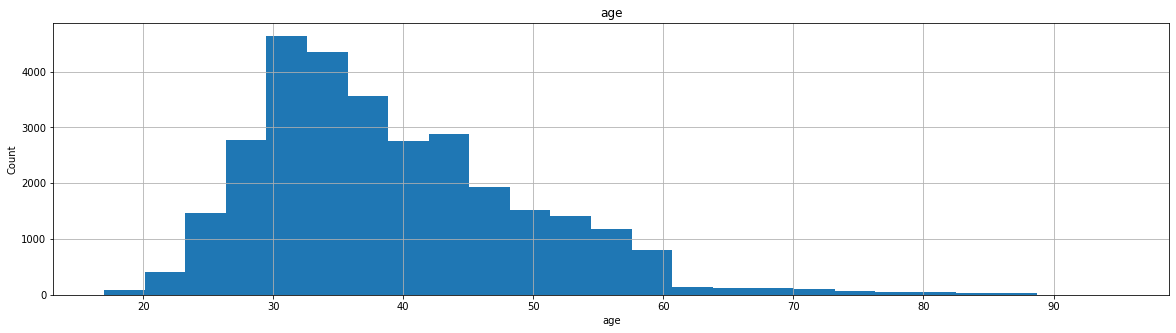

age  skew score ---->  0.9801618327451445


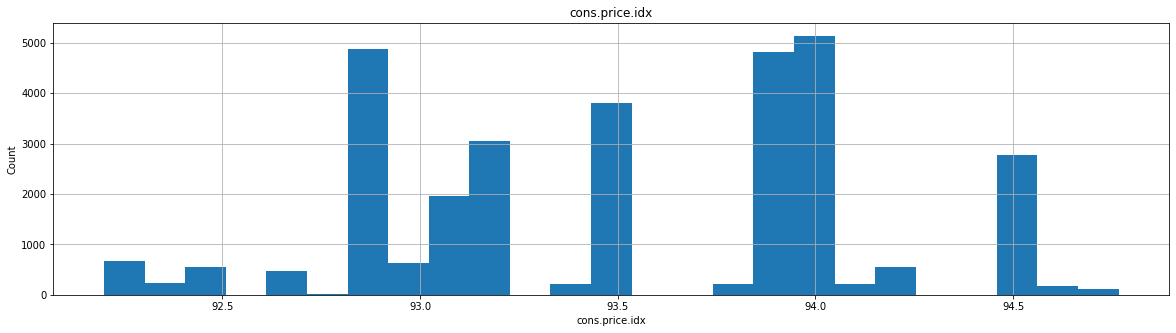

cons.price.idx  skew score ---->  -0.11871890873194521


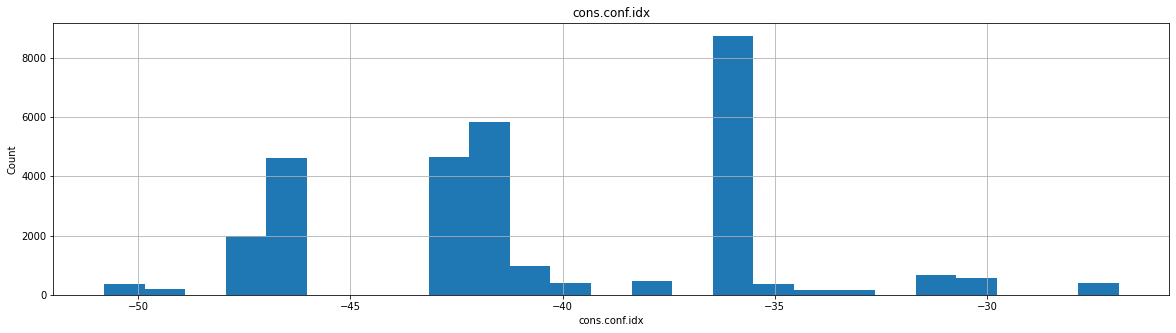

cons.conf.idx  skew score ---->  0.3739285710524658


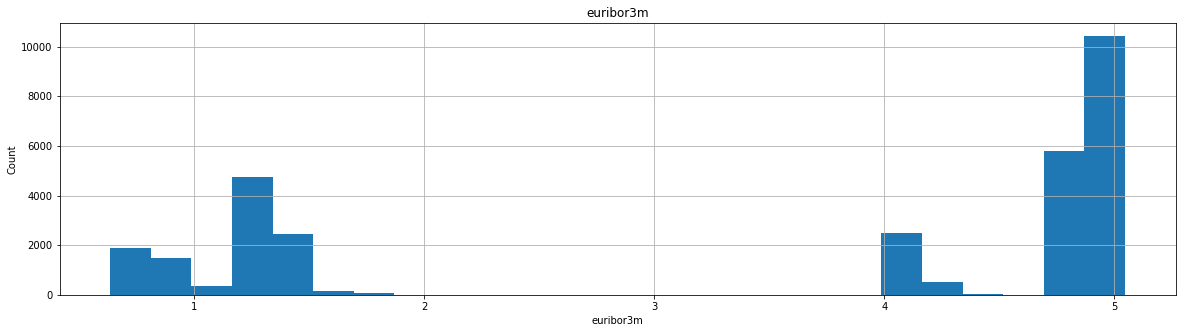

euribor3m  skew score ---->  -0.5250244494482186


In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution and the skewness
from scipy.stats import skew
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    print(feature,' skew score ----> ',skew(data[feature]))

'Age' is right skewed and can be transformed to normal distribution using boxcox or sny other transforms

# Analyzing outliers in contineuous Features

<AxesSubplot:>

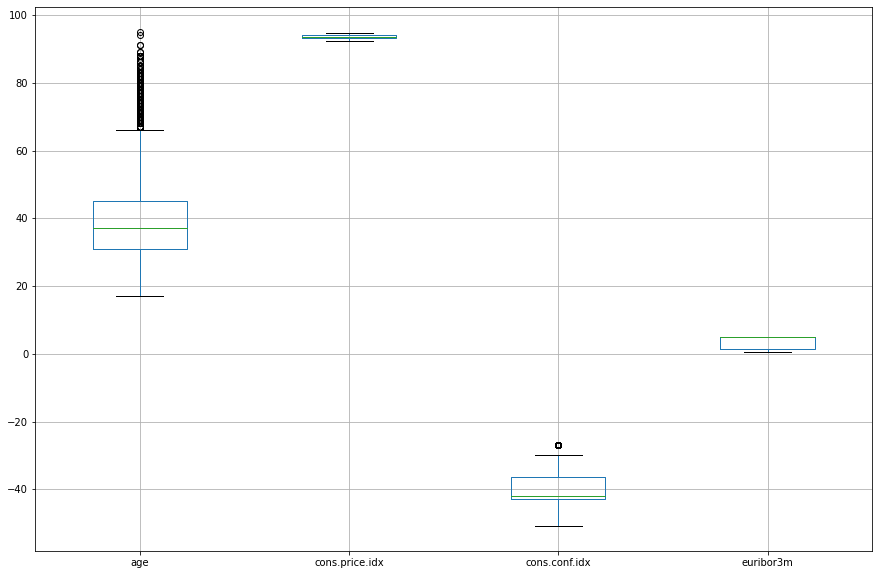

In [ ]:
data.boxplot(column=continuous_feature,figsize=(15,10))

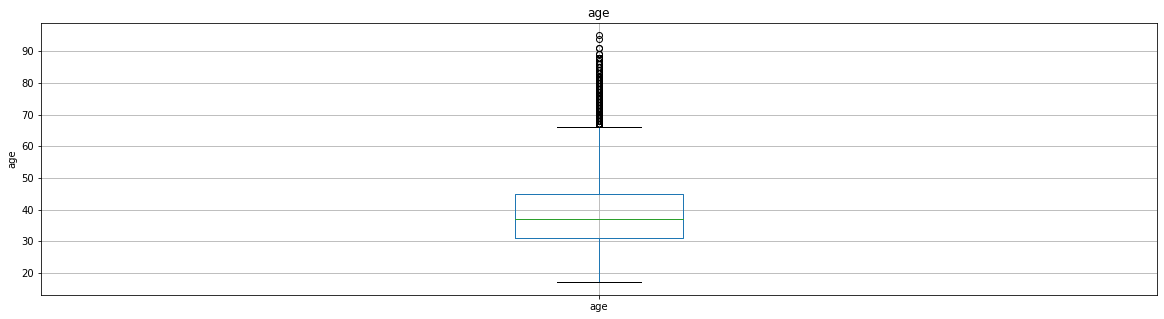

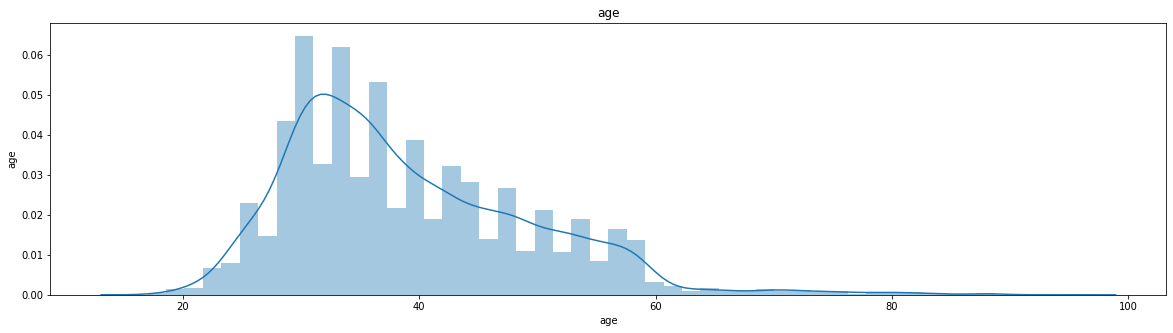

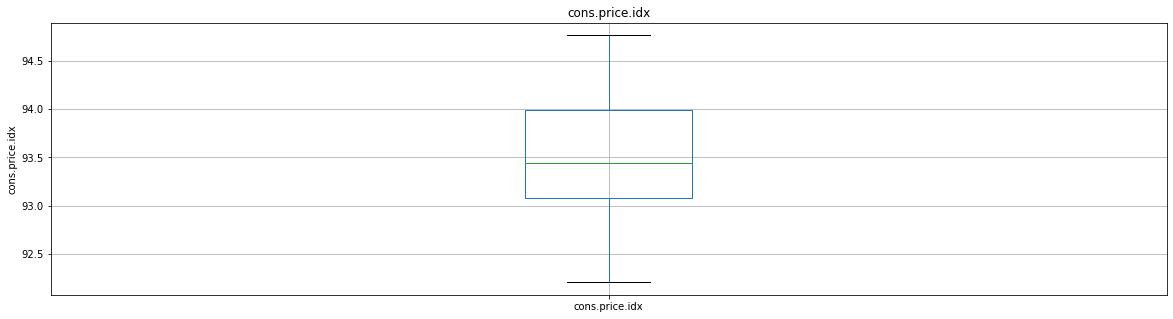

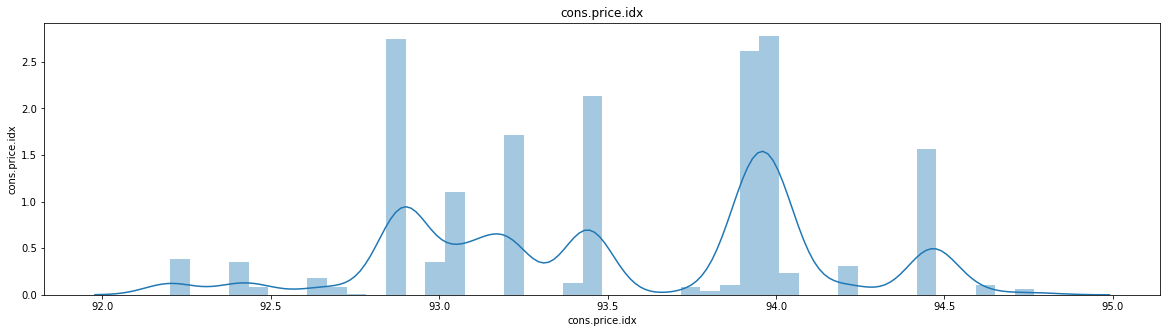

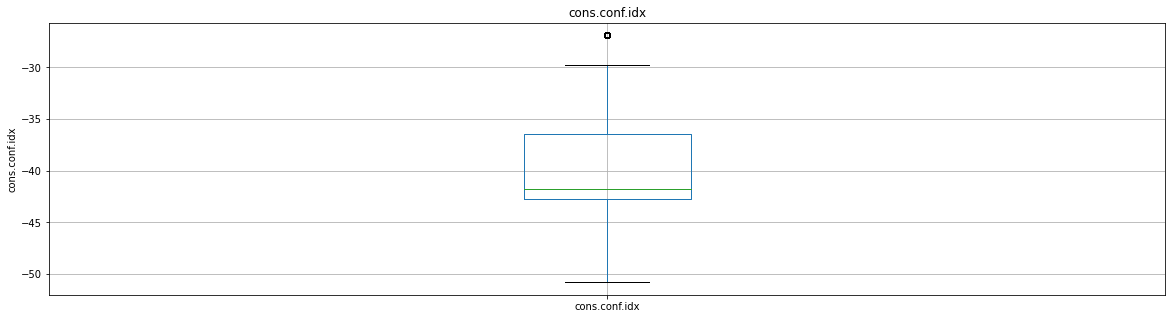

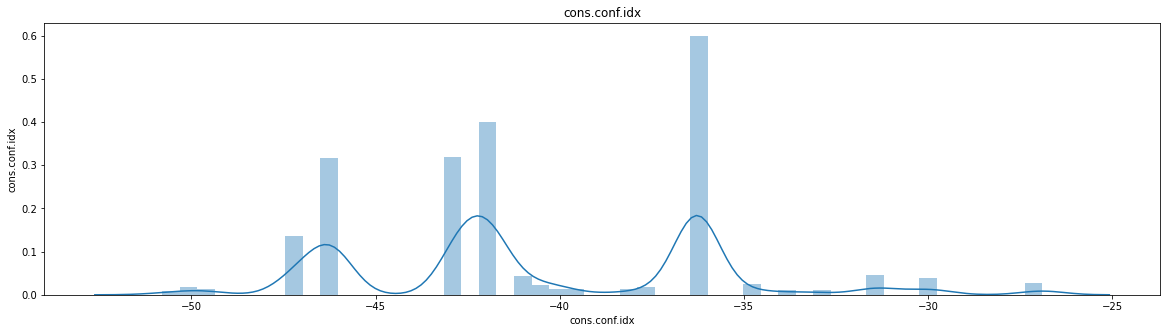

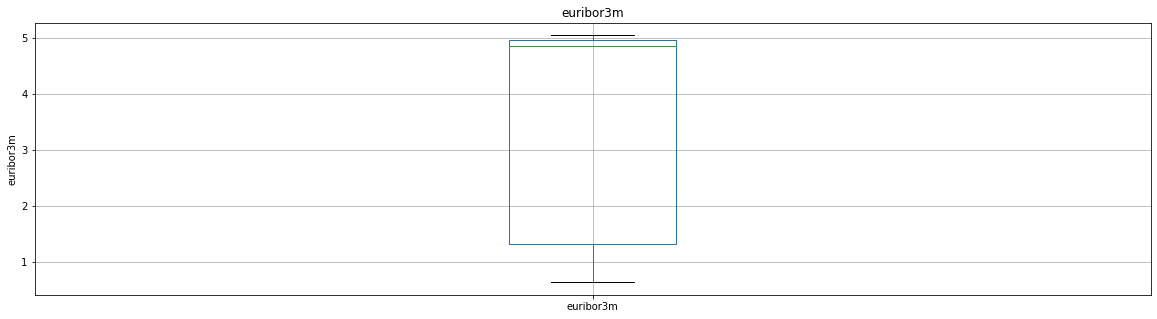

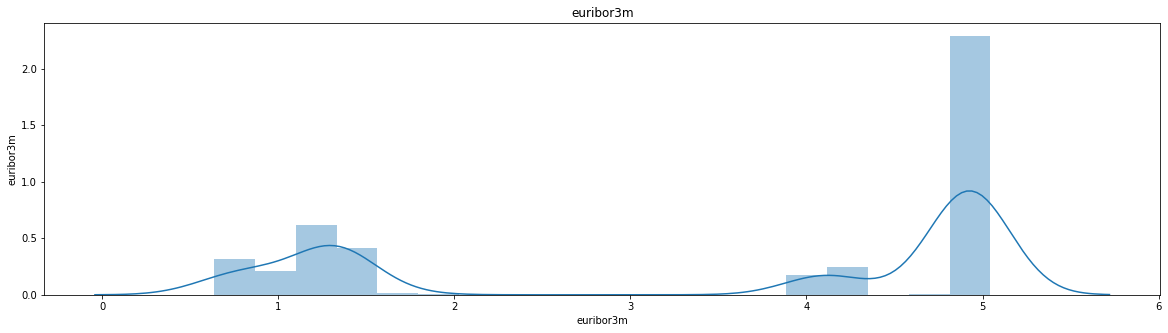

In [ ]:

for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show() 
    sns.distplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:

#We are going to check whether feature is guassian or normal distributed using Q-Q plot defined below
import scipy.stats as stat
import pylab 
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

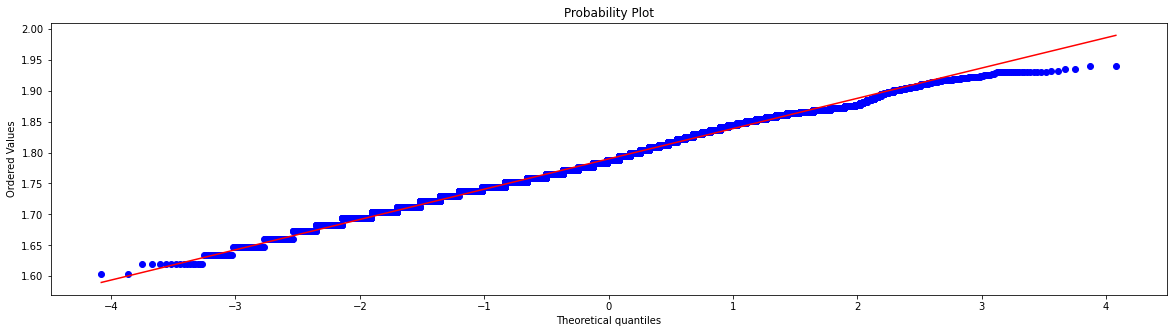

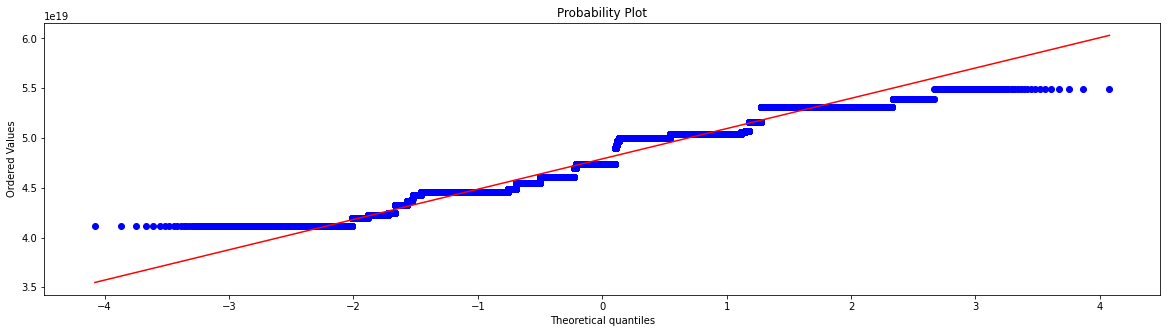

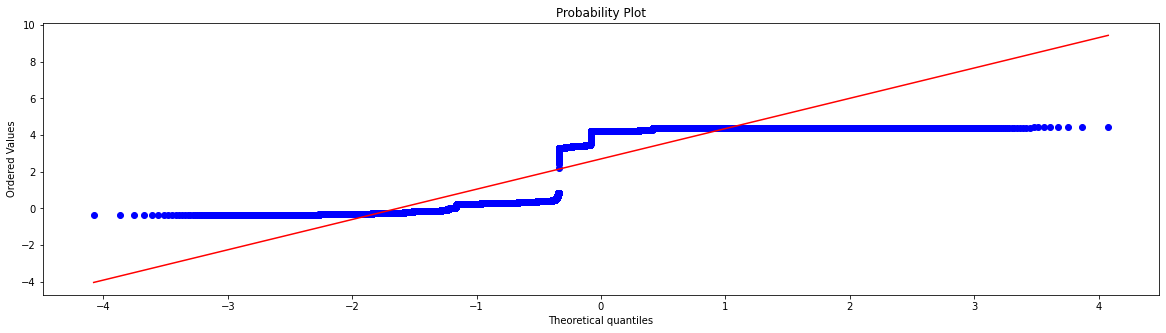

In [ ]:
## We will be using Box cox transformation to transform skewed positive distribution to gaussian distribution


for feature in continuous_feature:
    data=df.copy()
    if any(x<=0 for x in data[feature].unique()) == True :
        pass
    else:
        data[feature],parameters=stat.boxcox(data[feature])
        plt.xlabel(feature)
        plt.ylabel('default')
        plt.title(feature)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.show()

feature 'age' is right skewed which can be made into normal distribution using boxcox

# Pearson Correlation

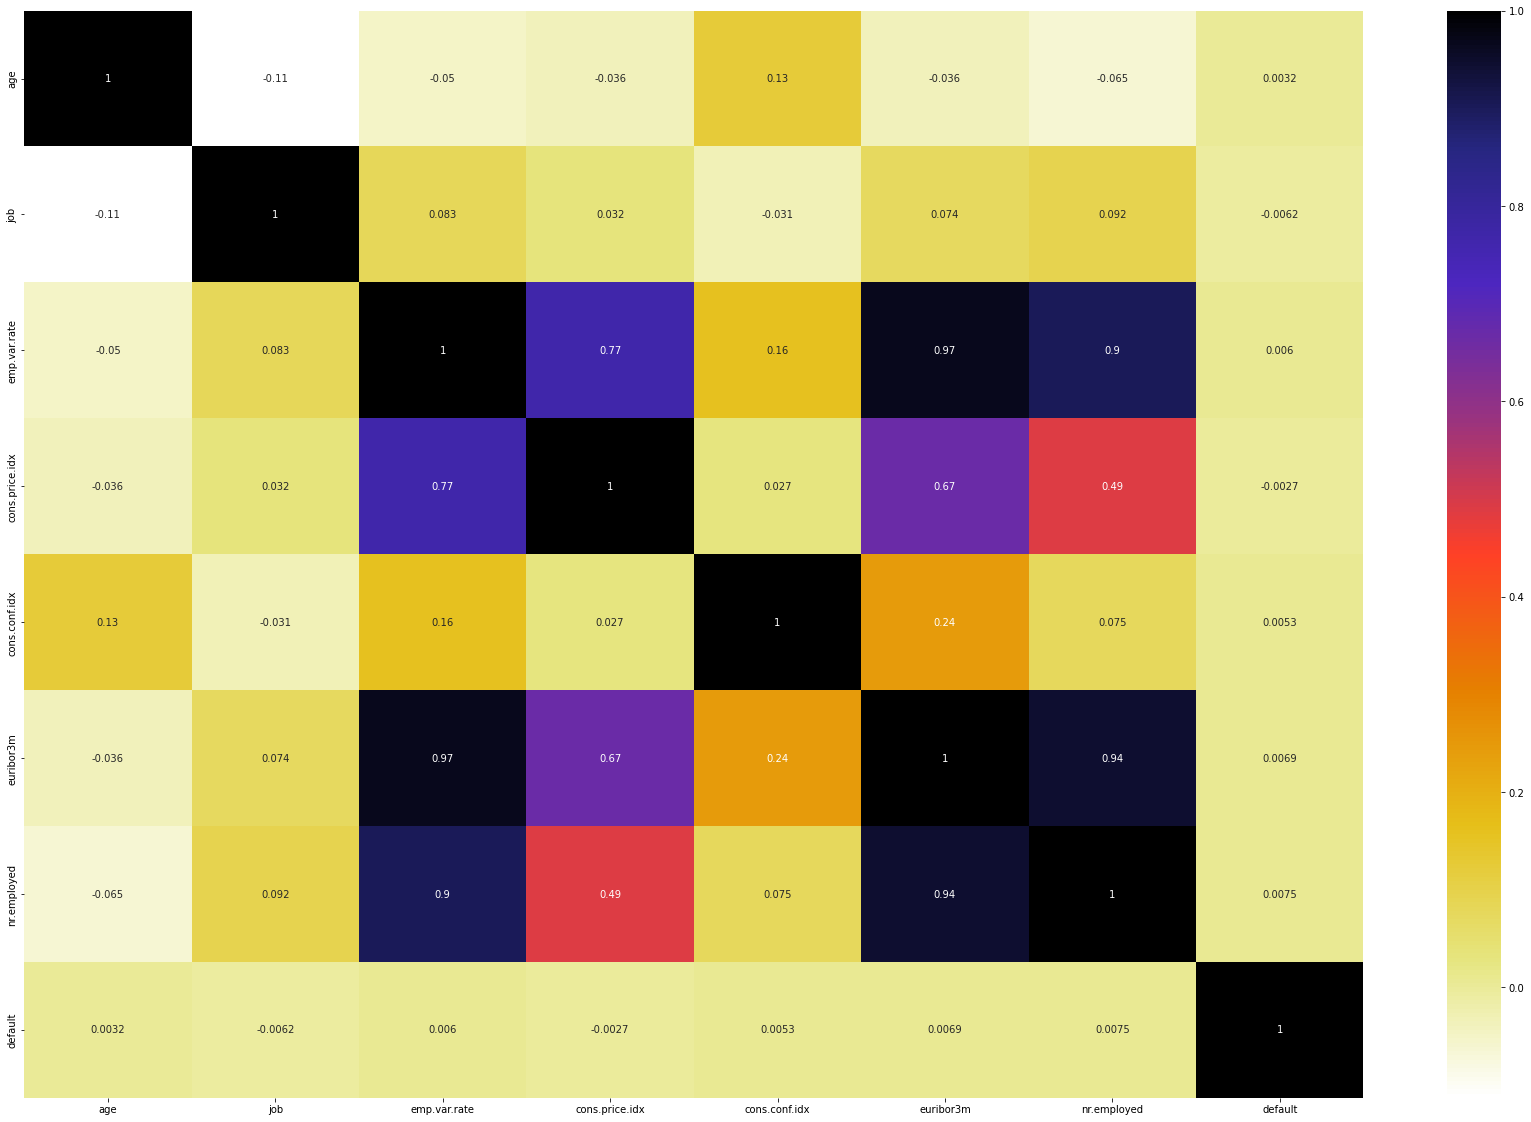

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

features 'euribor3m'and 'nr.employed' have high correlation we might drop one of them .b ut keep in mind that 'euribor3m' is contineuous and 'nr.employed' is descrete feature

In [ ]:
cor

,age,job,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
age,1.000000,-0.113062,-0.050409,-0.035762,0.125017,-0.036481,-0.064586,0.003171
job,-0.113062,1.000000,0.082581,0.032143,-0.030519,0.073664,0.091900,-0.006183
emp.var.rate,-0.050409,0.082581,1.000000,0.766055,0.157593,0.969412,0.900390,0.005985
cons.price.idx,-0.035762,0.032143,0.766055,1.000000,0.027217,0.667292,0.488871,-0.002722
cons.conf.idx,0.125017,-0.030519,0.157593,0.027217,1.000000,0.243637,0.075283,0.005252
euribor3m,-0.036481,0.073664,0.969412,0.667292,0.243637,1.000000,0.944871,0.006883
nr.employed,-0.064586,0.091900,0.900390,0.488871,0.075283,0.944871,1.000000,0.007460
default,0.003171,-0.006183,0.005985,-0.002722,0.005252,0.006883,0.007460,1.000000


In [ ]:
df_preprocessed = X_train_oho

In [ ]:
df_preprocessed 

,age,job,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0
1,37,7,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0
2,40,10,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,0,0
3,56,7,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,1
4,59,10,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,5,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,1,0
30484,46,9,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,0,0
30485,56,5,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,1,1,0
30486,44,8,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
df

,age,job,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,1,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,married,high.school,yes,no,1.1,93.994,-36.4,4.857,5191.0,0
2,40,10,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,married,high.school,no,yes,1.1,93.994,-36.4,4.857,5191.0,0
4,59,10,married,professional.course,no,no,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,5,married,professional.course,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
30484,46,9,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,5,married,university.degree,yes,no,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,8,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,4963.6,0


# Dealing Outliers

we are taking out all the numerical feature from dataset and splitting them to Discrete and Contineuous features . The outliers in the  Continous features  which are being dealt in the following lines BY REPLACING THEM.

In [ ]:
def remove_skewed_outliers(feature,data,skew_score ):
    if (skew_score > 0.25 or skew_score < -0.25) == True:
        ##Computing interquantile range to find boundaries
        iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
        lower_bridge=data[feature].quantile(0.25)-(iqr*3)
        upper_bridge=data[feature].quantile(0.25)+(iqr*3)
        data.loc[data[feature]<= lower_bridge ,feature]=lower_bridge
        data.loc[data[feature]>= upper_bridge,feature]=upper_bridge

age
skew score ---> 0.9801618327451445


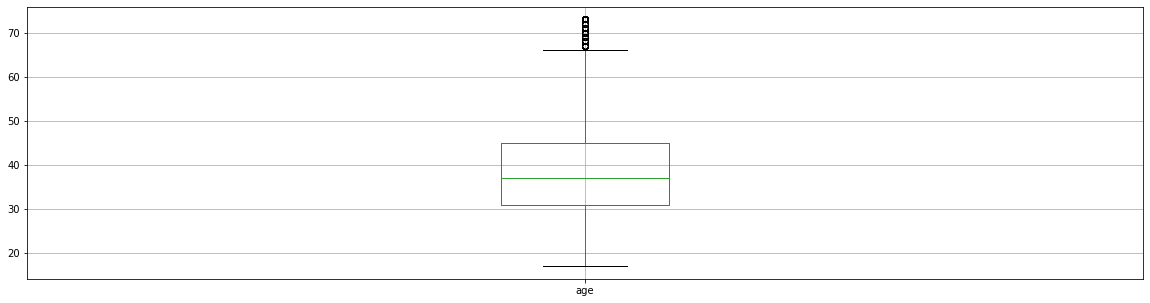

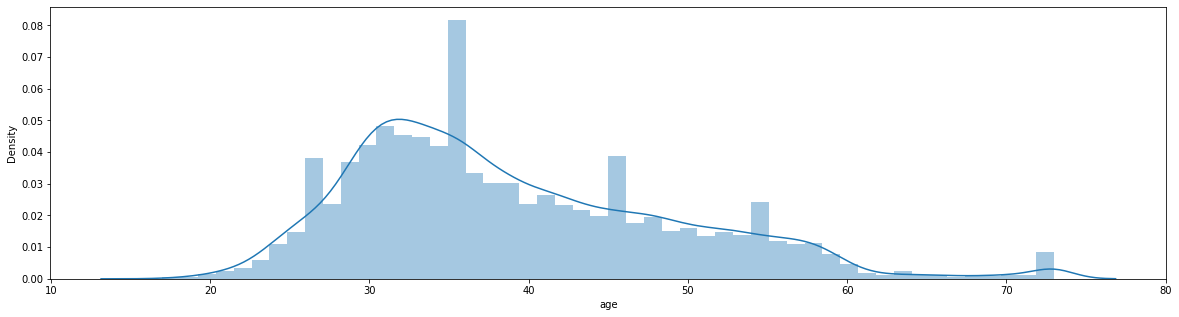

In [ ]:
data = df.copy()
print('age')
print('skew score --->',skew(data['age']))
skew_score = skew(data['age'])
remove_skewed_outliers('age',data,skew_score )
data.boxplot(column='age')
plt.figure()
sns.distplot(data['age'])
plt.show()

age
0.8261862776917411


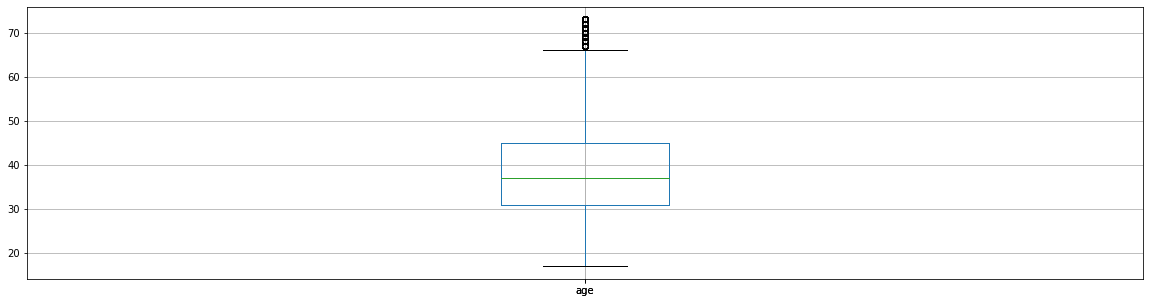

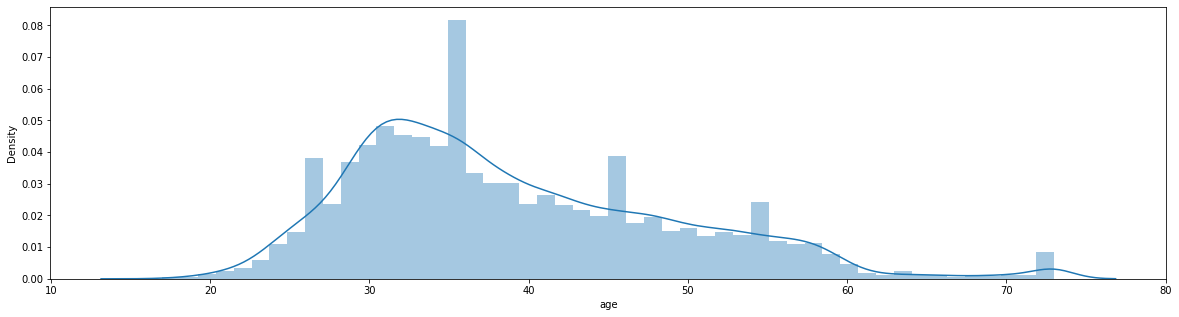

cons.price.idx
-0.11871890873194521


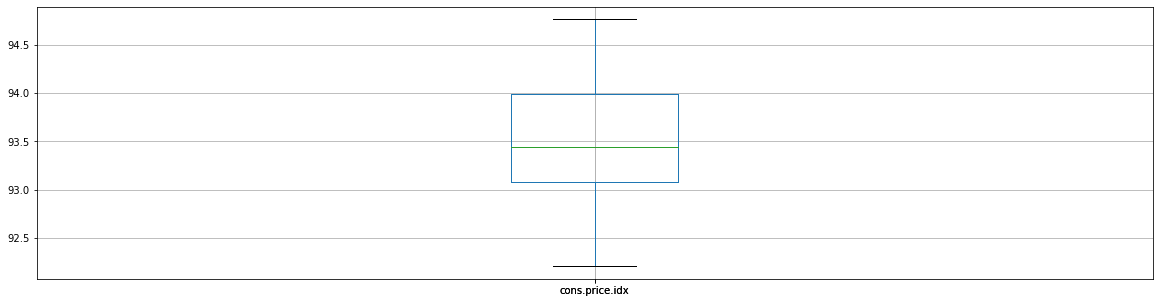

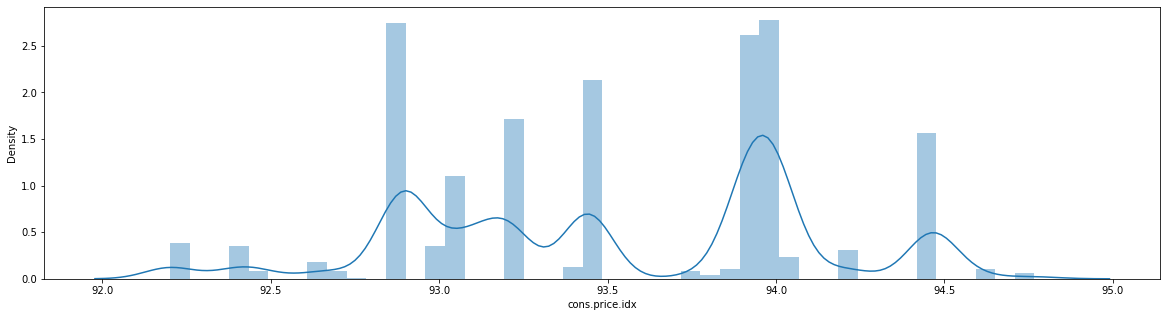

cons.conf.idx
0.3739285710524658


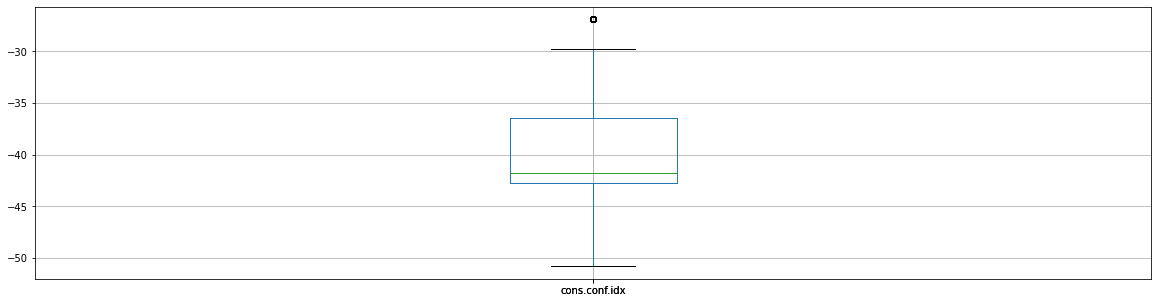

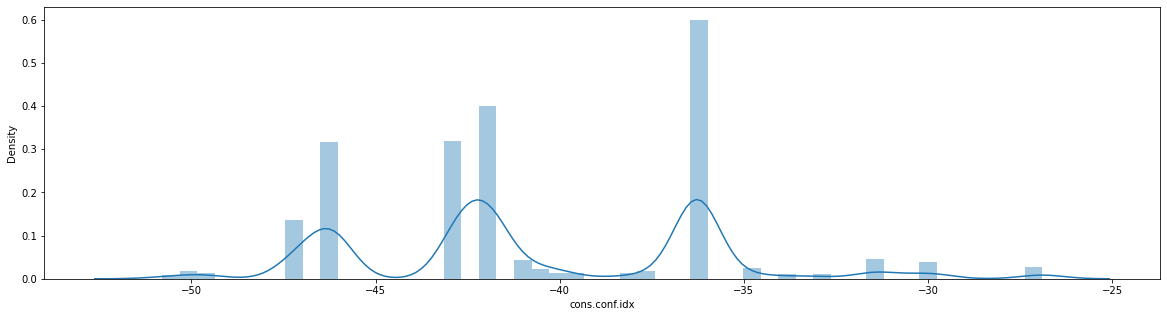

euribor3m
-0.5250244494482186


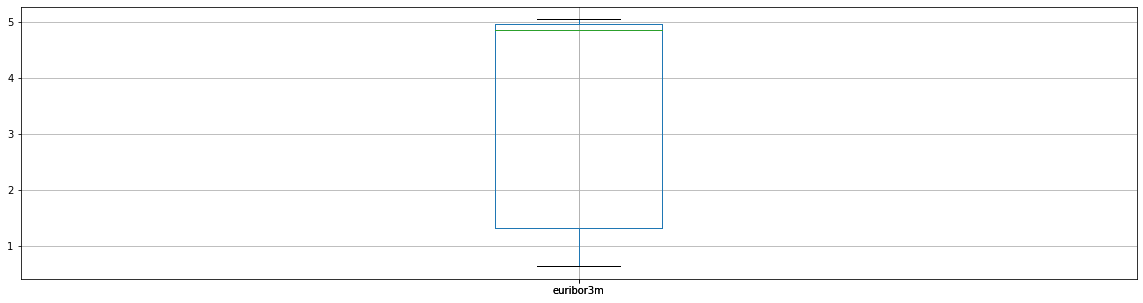

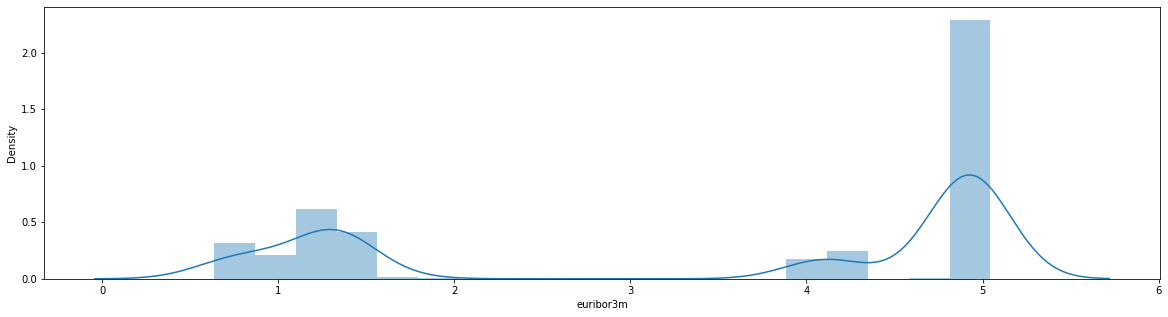

In [ ]:
from scipy.stats import skew
for col in continuous_feature:
    print(col)
    print(skew(data[col]))
    skew_score = skew(data[col])
    data.boxplot(column=col)
    remove_skewed_outliers(col,data,skew_score )
    data.boxplot(column=col)
    plt.figure()
    sns.distplot(data[col])
    plt.show()

<AxesSubplot:>

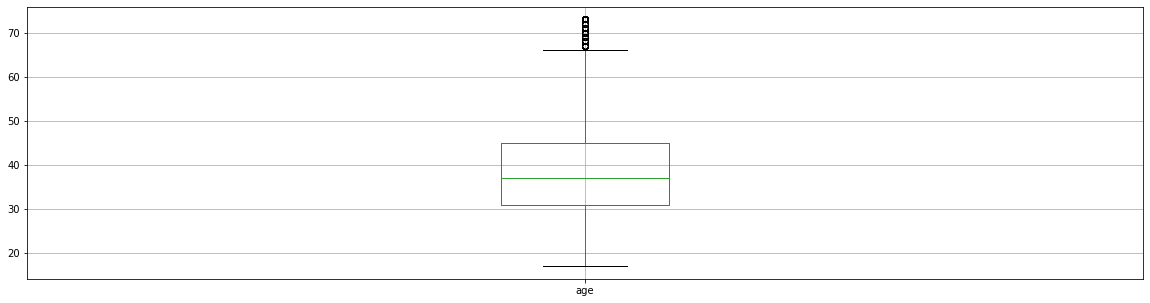

In [ ]:
data.boxplot(column='age')

# Balancing the Dataset using RANDOM OVER SAMPLING

In [ ]:
df2 = df_preprocessed.copy()

In [ ]:
df2

,age,job,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0
1,37,7,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0
2,40,10,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,0,0
3,56,7,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,1
4,59,10,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,5,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,1,0
30484,46,9,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,0,0
30485,56,5,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,1,1,0
30486,44,8,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,1,0,0,0


# Using MinMax scaler to normalise

In [ ]:
cols_to_scale = ['age','job','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2

,age,job,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes
0,0.500000,0.1,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,0,0,0,0,0,0,0,0,0
1,0.256410,0.7,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,0,0,0,1,0,0,0,1,0
2,0.294872,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,0,1,0,0,0,0,0,0,0
3,0.500000,0.7,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,0,0,0,1,0,0,0,0,1
4,0.538462,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,0.717949,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0,1,0,0,0,0,0,1,0,1,0
30484,0.371795,0.9,0.479167,1.000000,0.00000,0.089322,0.000000,0,1,0,0,0,0,0,1,0,0,0
30485,0.500000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0,1,0,0,0,0,0,0,1,1,0
30486,0.346154,0.8,0.479167,1.000000,0.00000,0.089322,0.000000,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

age: [0.5        0.25641026 0.29487179 0.53846154 0.08974359 0.1025641
 0.15384615 0.51282051 0.23076923 0.42307692 0.16666667 0.48717949
 0.30769231 0.47435897 0.21794872 0.44871795 0.19230769 0.26923077
 0.35897436 0.28205128 0.55128205 0.46153846 0.43589744 0.3974359
 0.34615385 0.17948718 0.41025641 0.20512821 0.32051282 0.24358974
 0.33333333 0.37179487 0.14102564 0.52564103 0.12820513 0.38461538
 0.11538462 0.06410256 0.07692308 0.03846154 0.05128205 0.01282051
 0.67948718 0.56410256 0.62820513 0.75641026 0.64102564 0.71794872
 0.91025641 1.         0.02564103 0.65384615 0.74358974 0.58974359
 0.57692308 0.61538462 0.70512821 0.6025641  0.69230769 0.66666667
 0.78205128 0.87179487 0.80769231 0.79487179 0.76923077 0.84615385
 0.82051282 0.73076923 0.83333333 0.         0.8974359  0.94871795
 0.98717949 0.88461538 0.85897436 0.92307692]
job: [0.1 0.7 1.  0.8 0.9 0.2 0.5 0.3 0.6 0.  0.4]
emp.var.rate: [0.9375     1.         0.6875     0.66666667 0.33333333 0.10416667
 0.         0.0

In [ ]:
df2['default'].value_counts()

0    30485
1        3
Name: default, dtype: int64

# Handling imbalanced data using random over sampling

In [ ]:
#### Independent and Dependent Features
X=df2.drop("default",axis=1)
y=df2.default

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=50,stratify=y,shuffle=True)

In [ ]:
y_train.value_counts()

0    21339
1        2
Name: default, dtype: int64

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 21339, 1: 2})

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(0.9,sampling_strategy='minority')
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 21339, 1: 2})
The number of classes after fit Counter({0: 21339, 1: 19205})


# Modelling

# 1. random Forest classifier

[[4810 4336]
 [   0    1]]
0.5259647972012682
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      9146
           1       0.00      1.00      0.00         1

    accuracy                           0.53      9147
   macro avg       0.50      0.76      0.34      9147
weighted avg       1.00      0.53      0.69      9147



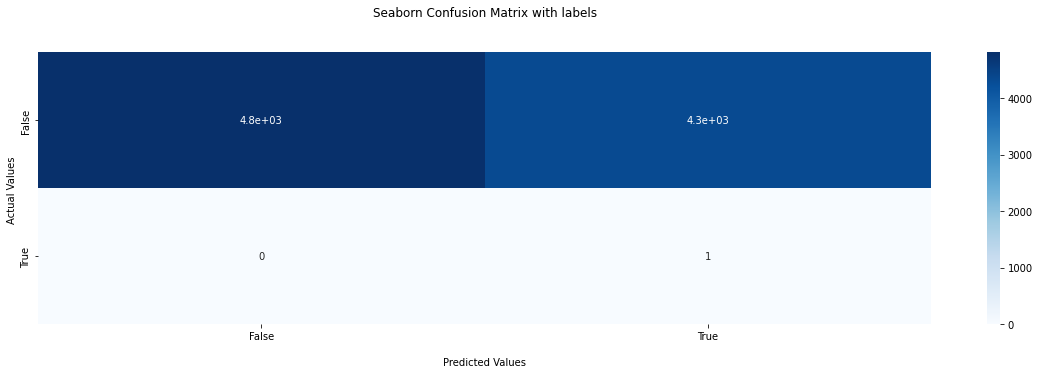

In [ ]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train_ns, y_train_ns)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=dummy_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
pl = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

pl.set_title('Seaborn Confusion Matrix with labels\n\n');
pl.set_xlabel('\nPredicted Values')
pl.set_ylabel('Actual Values ');
pl.xaxis.set_ticklabels(['False','True'])
pl.yaxis.set_ticklabels(['False','True'])
plt.show()

The below code gives the RFC score

In [ ]:
clf=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
clf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=3, random_state=50)

[[8486  660]
 [   0    1]]
0.9278451951459495
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9146
           1       0.00      1.00      0.00         1

    accuracy                           0.93      9147
   macro avg       0.50      0.96      0.48      9147
weighted avg       1.00      0.93      0.96      9147



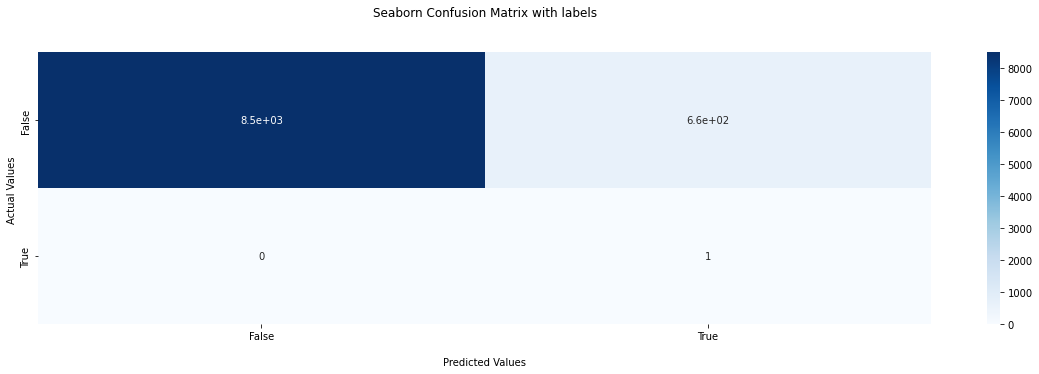

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
pl = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

pl.set_title('Seaborn Confusion Matrix with labels\n\n');
pl.set_xlabel('\nPredicted Values')
pl.set_ylabel('Actual Values ');
pl.xaxis.set_ticklabels(['False','True'])
pl.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

print(random_grid)


{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)



In [ ]:
rf_random.fit(X_train_ns, y_train_ns)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   4.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   4.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   4.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.9s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.8s
[CV] END ......................max_depth=5, n_estimators=600; total time=   3.9s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   6.0s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x136d71ee0>,
                   verbose=2)

In [ ]:
#after gridsearch check. rfc with best estimators

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=600)

[[8852  294]
 [   0    1]]
0.9678583142013775
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9146
           1       0.00      1.00      0.01         1

    accuracy                           0.97      9147
   macro avg       0.50      0.98      0.50      9147
weighted avg       1.00      0.97      0.98      9147



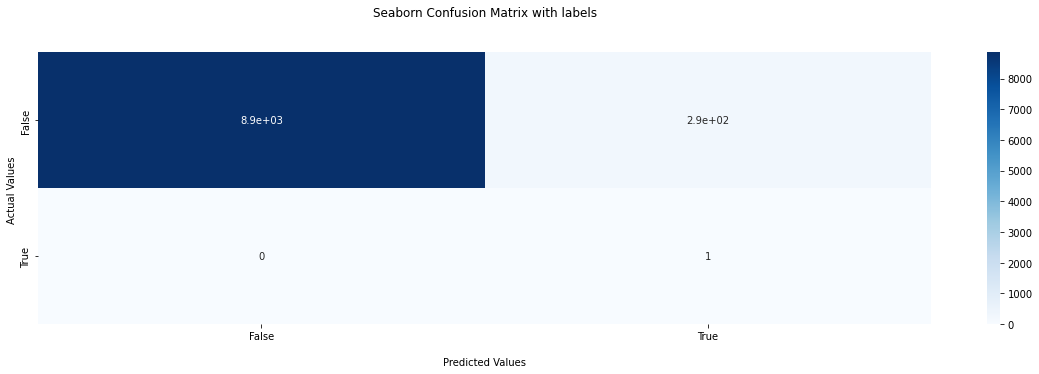

In [ ]:
clf = rf_random.best_estimator_
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
pl = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

pl.set_title('Seaborn Confusion Matrix with labels\n\n');
pl.set_xlabel('\nPredicted Values')
pl.set_ylabel('Actual Values ');
pl.xaxis.set_ticklabels(['False','True'])
pl.yaxis.set_ticklabels(['False','True'])
plt.show()

# 2. Extra Gradient Boosted Decision Tree Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_ns, y_train_ns)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_ns, y_train_ns)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))


Learning rate:  0.05
Accuracy score (training): 0.981
Accuracy score (validation): 0.964
Learning rate:  0.075
Accuracy score (training): 0.978
Accuracy score (validation): 0.957
Learning rate:  0.1
Accuracy score (training): 0.986
Accuracy score (validation): 0.974
Learning rate:  0.25
Accuracy score (training): 0.995
Accuracy score (validation): 0.991
Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.995
Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.997
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.999


[[8819  327]
 [   0    1]]
0.964250573958675
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9146
           1       0.00      1.00      0.01         1

    accuracy                           0.96      9147
   macro avg       0.50      0.98      0.49      9147
weighted avg       1.00      0.96      0.98      9147



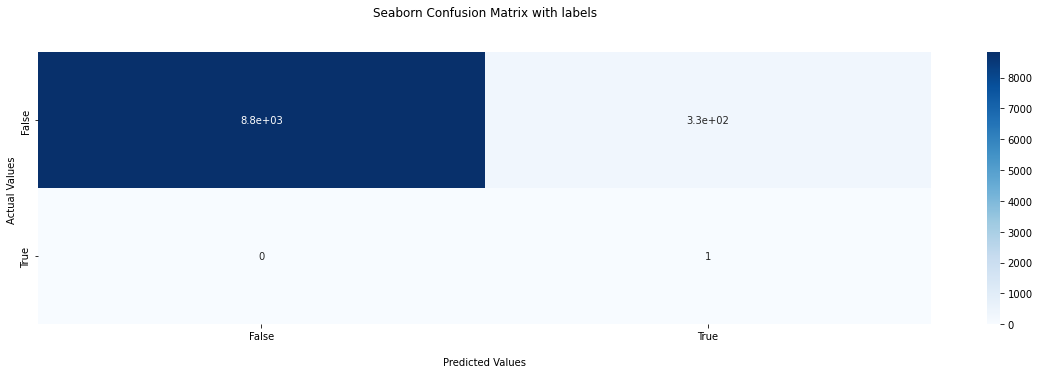

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_ns, y_train_ns)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=gb_clf2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
pl = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

pl.set_title('Seaborn Confusion Matrix with labels\n\n');
pl.set_xlabel('\nPredicted Values')
pl.set_ylabel('Actual Values ');
pl.xaxis.set_ticklabels(['False','True'])
pl.yaxis.set_ticklabels(['False','True'])
plt.show()

Withlut gridsearchcv it has a False positive count of 327

In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 9)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
learning_rate=[float(x) for x in np.linspace(0, 1, num = 100)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print(random_grid)

{'n_estimators': [5, 10, 16, 21, 27, 33, 38, 44, 50], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'learning_rate': [0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb_clf = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
gb_random = RandomizedSearchCV(estimator = gb_clf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)

In [ ]:
gb_random.fit(X_train_ns, y_train_ns)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] END learning_rate=0.7777777777777778, max_depth=16, n_estimators=33; total time=   0.7s
[CV] EN

[CV] END learning_rate=0.6464646464646465, max_depth=1, n_estimators=16; total time=   0.2s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_estimators=27; total time=   0.9s
[CV] END learning_rate=0.11111111111111112, max_depth=16, n_es

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.0,
                                                          0.010101010101010102,
                                                          0.020202020202020204,
                                                          0.030303030303030304,
                                                          0.04040404040404041,
                                                          0.05050505050505051,
                                                          0.06060606060606061,
                                                          0.07070707070707072,
                                                          0.08080808080808081,
                                                          0.09090909090909091,
                                                          0.10101010101010102,
                                                          0.11111111

In [ ]:
gb_random.best_estimator_

GradientBoostingClassifier(learning_rate=0.7777777777777778, max_depth=16,
                           n_estimators=33)

[[9146    0]
 [   0    1]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9146
           1       1.00      1.00      1.00         1

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147



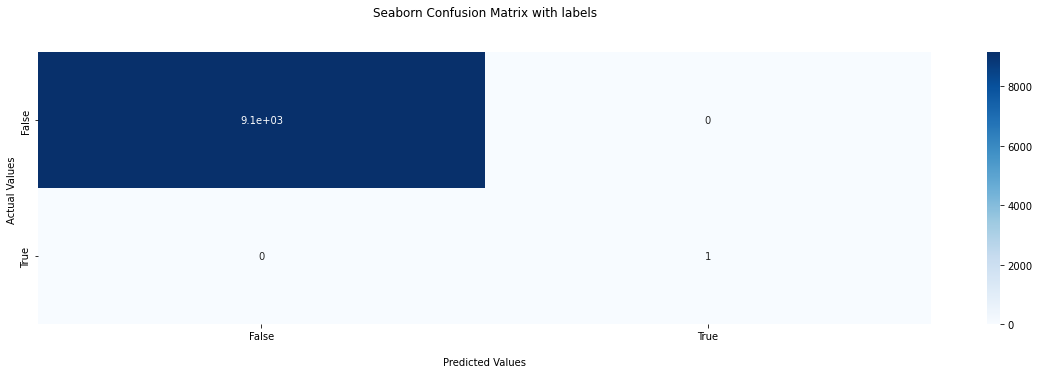

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2022-04-26 21:38:06,461 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...


2022-04-26 21:38:06,666 - INFO     - Executing shutdown...


In [ ]:
clf = gb_random.best_estimator_
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
pl = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

pl.set_title('Seaborn Confusion Matrix with labels\n\n');
pl.set_xlabel('\nPredicted Values')
pl.set_ylabel('Actual Values ');
pl.xaxis.set_ticklabels(['False','True'])
pl.yaxis.set_ticklabels(['False','True'])
plt.show()